# <center>Chess Puzzle Rating Estimation EDA</center>

## Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import pandas as pd

## Starter 

In [2]:
# Load raw data
df = pd.read_csv("../data/raw/lichess_db_puzzle.csv")
df.shape

(3888765, 10)

In [3]:
df.sample()


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
1692733,Qzx8i,r3r1k1/3q1pb1/p5pp/1p1n4/3pN3/PP1P1Q2/1B3PPP/2...,d5f6 e4f6 g7f6 f3f6,903,96,94,478,crushing fork middlegame short,https://lichess.org/zcPsOwY1/black#49,NaN


In [4]:
df.describe()


,Rating,RatingDeviation,Popularity,NbPlays
count,3.888765e+06,3.888765e+06,3.888765e+06,3.888765e+06
mean,1.515566e+03,9.027605e+01,8.354723e+01,1.674349e+03
std,5.432348e+02,4.303419e+01,2.140293e+01,4.459941e+03
min,3.990000e+02,4.900000e+01,-1.000000e+02,0.000000e+00
25%,1.085000e+03,7.500000e+01,8.200000e+01,9.300000e+01
50%,1.478000e+03,7.800000e+01,8.900000e+01,3.710000e+02
75%,1.917000e+03,8.800000e+01,9.300000e+01,1.325000e+03
max,3.331000e+03,5.000000e+02,1.000000e+02,1.007625e+06


1. Mean Rating
- The mean rating of puzzles is **1515**.

2. High Rating Deviation
- Certain puzzles have a **RatingDeviation** of **500**.
- These ratings may be **misleading** and require careful consideration during model training.

3. Negative Popularity
- Some puzzles have a **Popularity** score of **-100**.
- They can be **discarded** from the training dataset to improve model reliability.

4. Unplayed Puzzles
- A subset of puzzles has **never been played**.
- Ratings for these puzzles are unsupported by empirical data and could be **misleading**.

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888765 entries, 0 to 3888764
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 296.7+ MB


In [6]:
df.isnull().sum()


PuzzleId                 0
FEN                      0
Moves                    0
Rating                   0
RatingDeviation          0
Popularity               0
NbPlays                  0
Themes                1903
GameUrl                  0
OpeningTags        3029847
dtype: int64

## Univariate Analysis

In [12]:
from src.lib.eda_helpers import box_plot, hist_plot, bar_plot, IQR_outlier_analysis, is_valid_fen, is_valid_move

### Rating

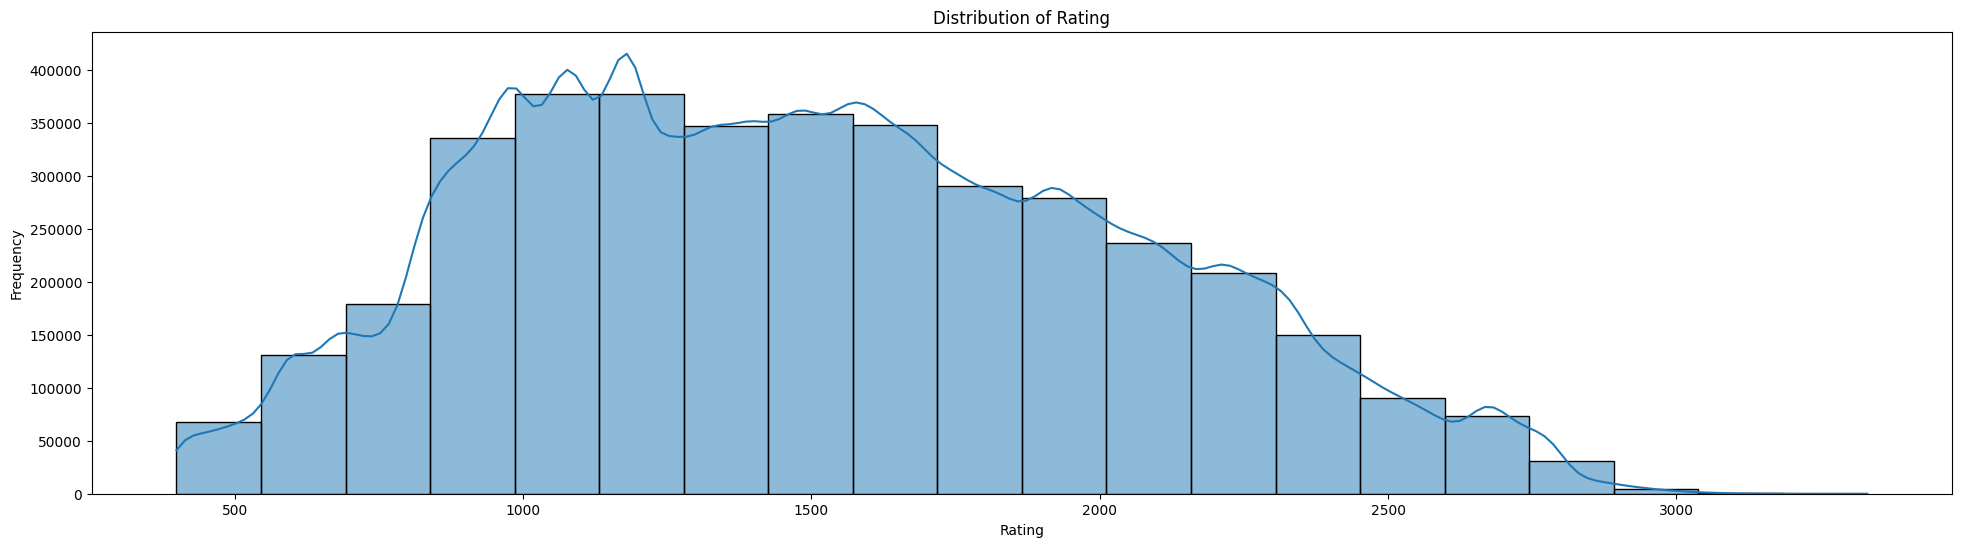

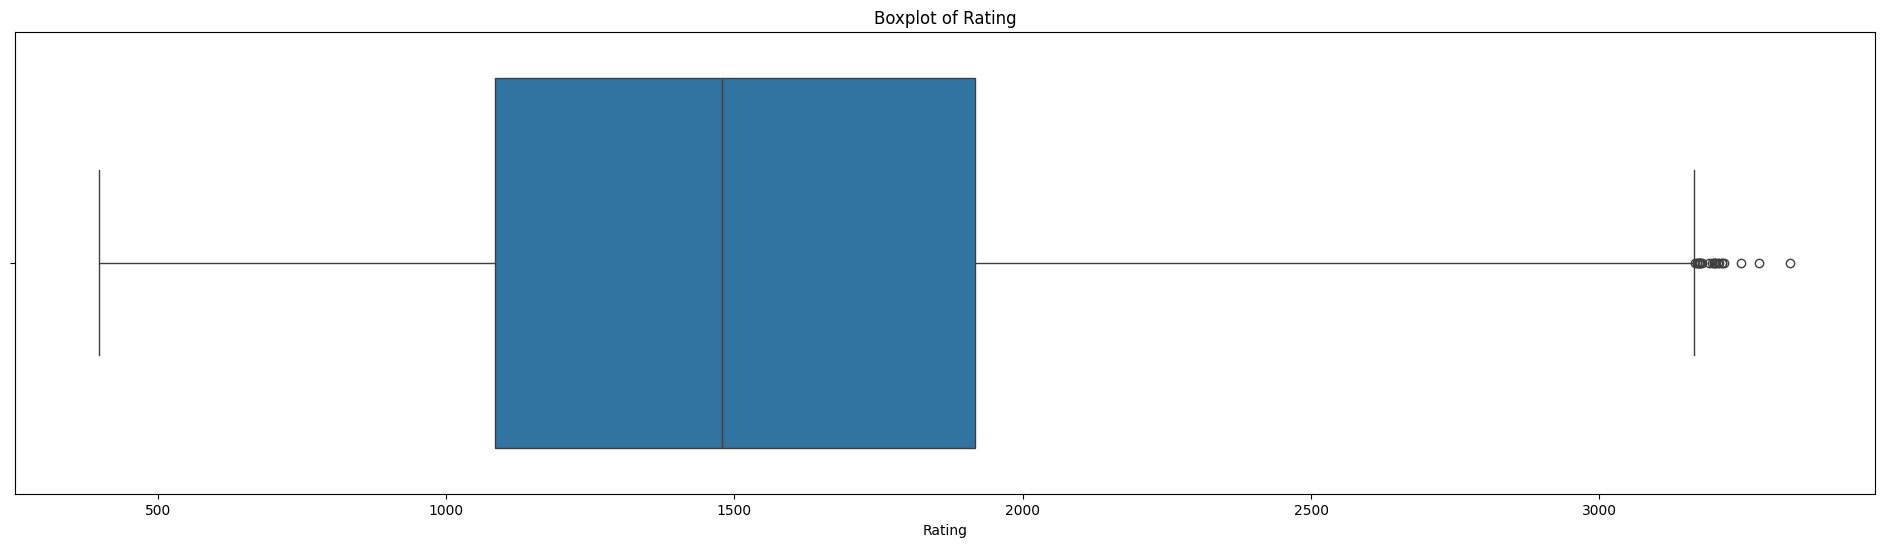

In [25]:
hist_plot(df, feature="Rating")
box_plot(df, feature="Rating")

### RatingDeviation

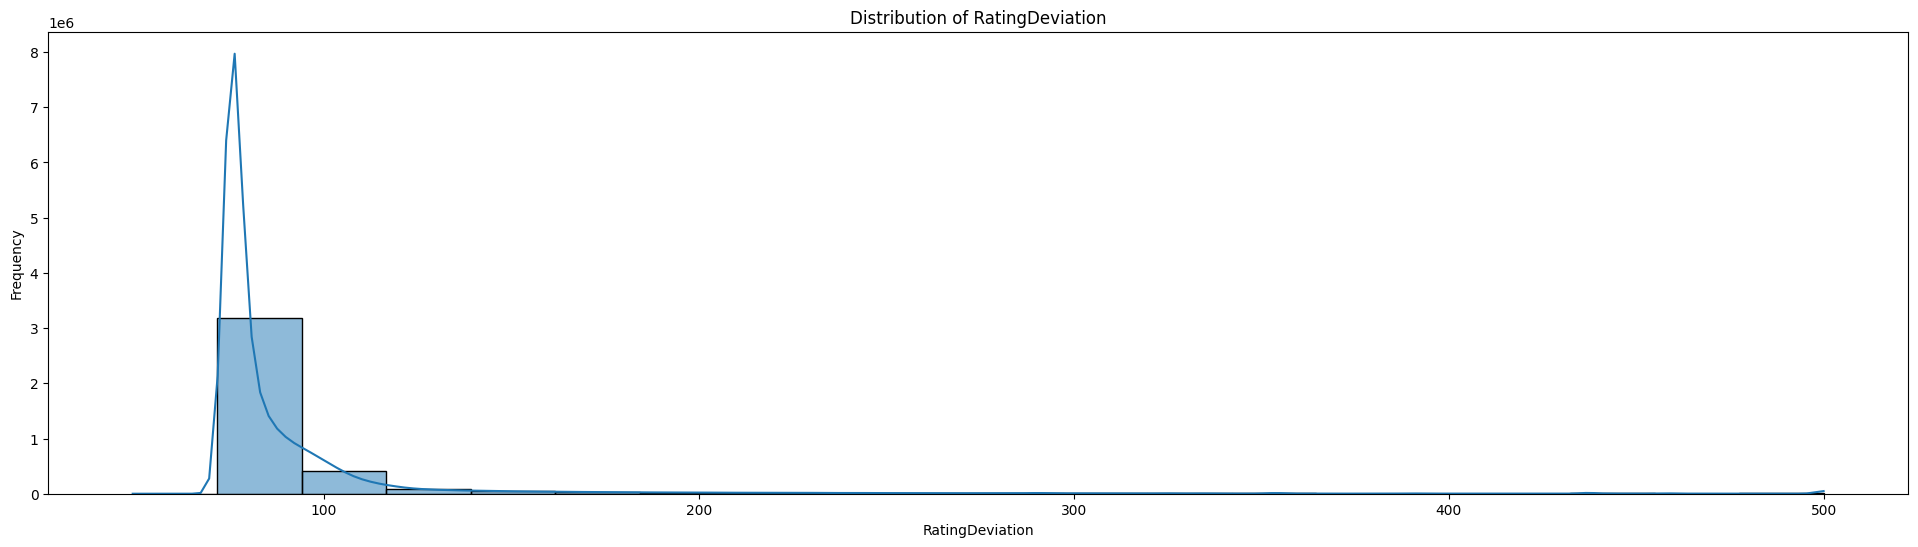

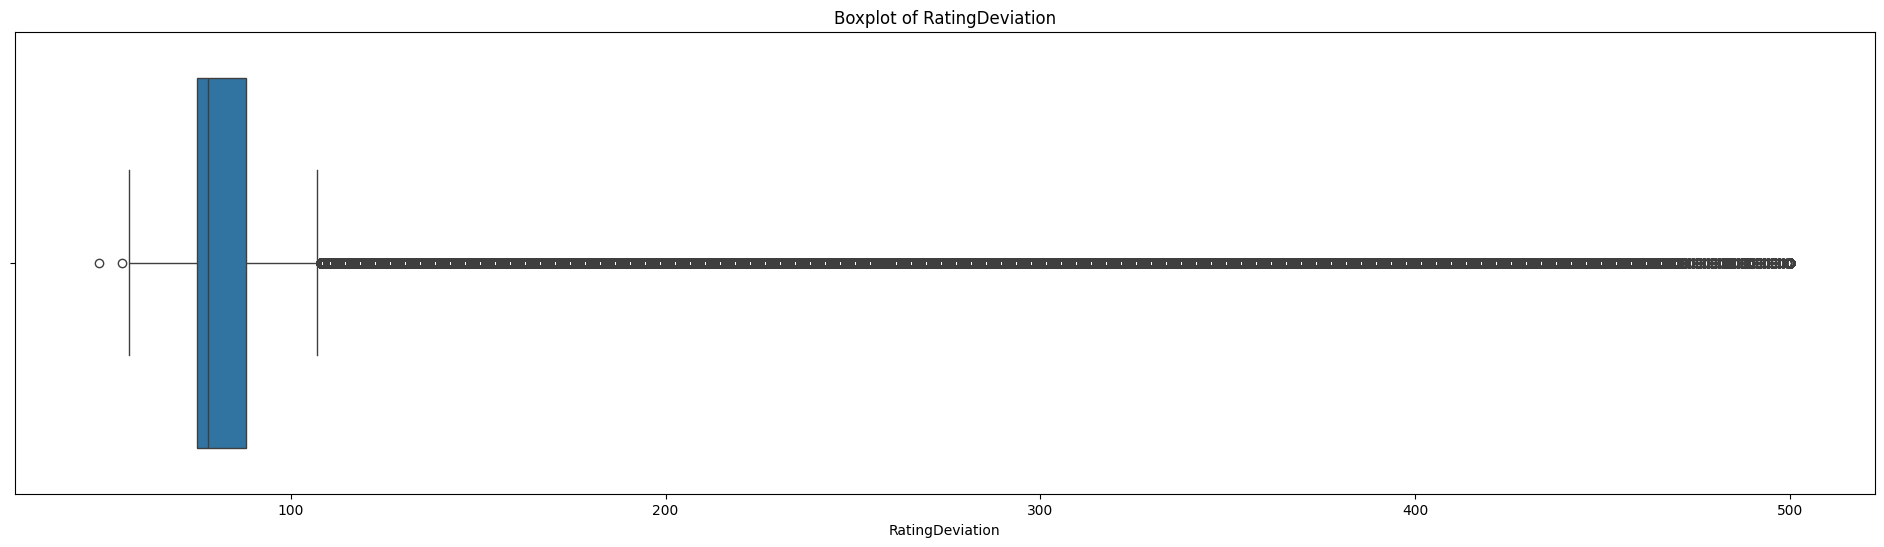

Lower Bound: 55.5
Upper Bound: 107.5
Number of Outliers: 369558


In [29]:
hist_plot(df, feature="RatingDeviation")
box_plot(df, feature="RatingDeviation")
IQR_outlier_analysis(df, feature="RatingDeviation")

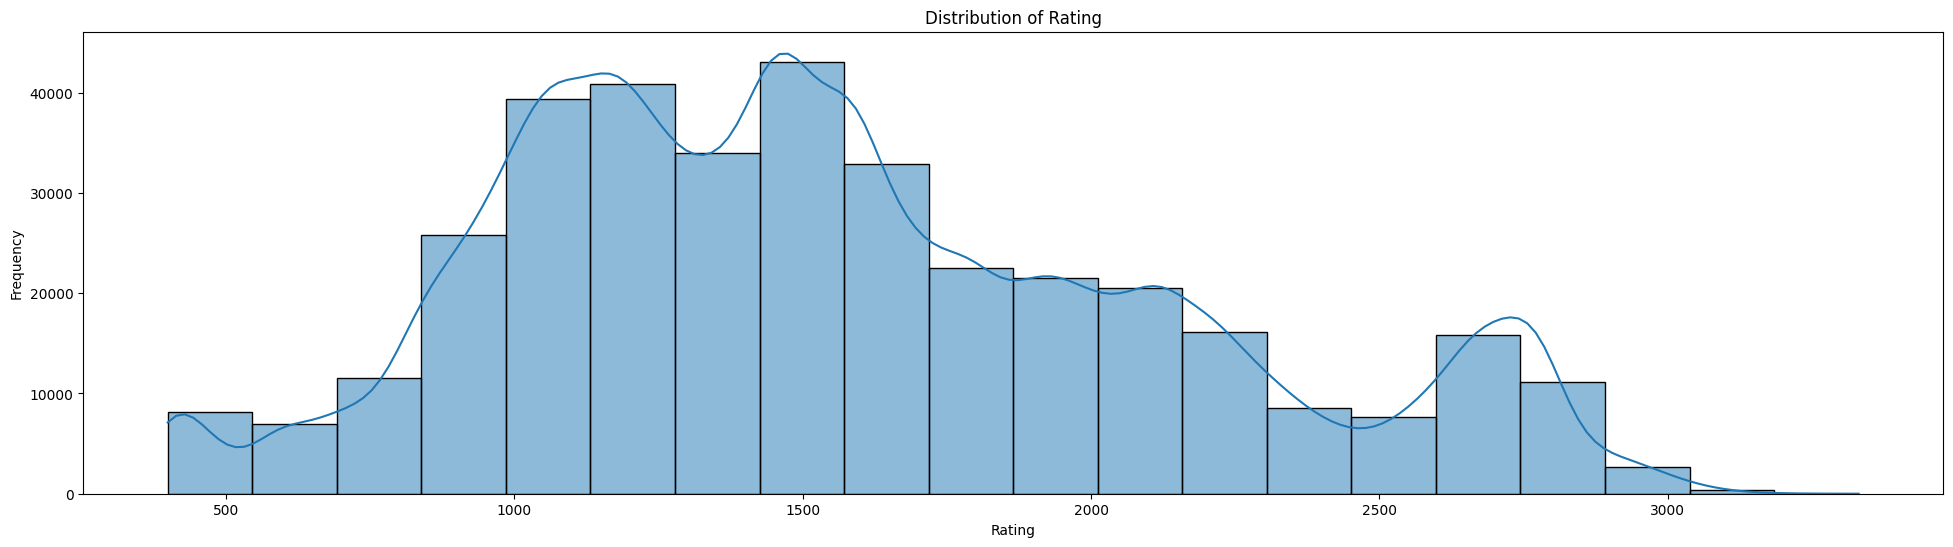

In [31]:
hist_plot(df[df["RatingDeviation"] > 107.5], feature="Rating")

- RatingDevaiation > 107.5 data could be removed from dataset since the distribution is similar with original distribution.

### Popularity

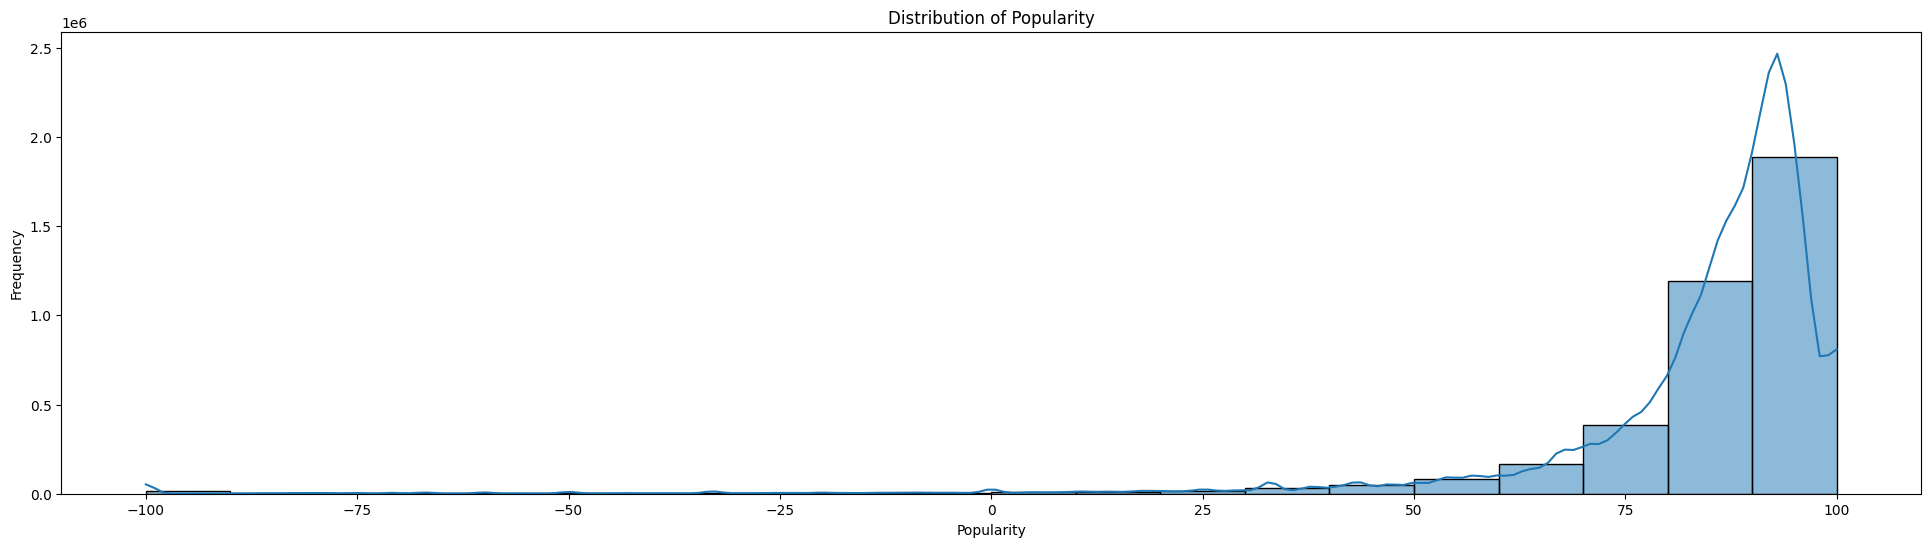

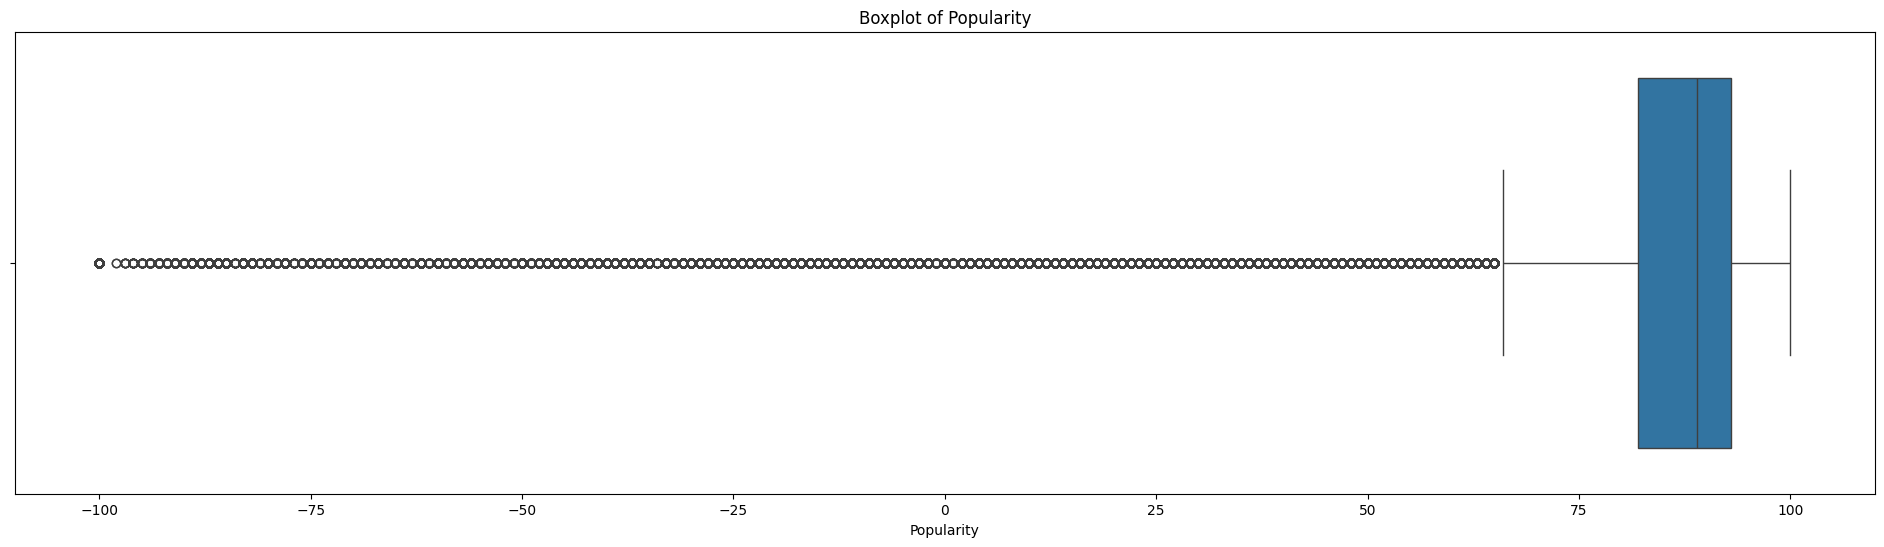

Lower Bound: 65.5
Upper Bound: 109.5
Number of Outliers: 331889


In [32]:
hist_plot(df, feature="Popularity")
box_plot(df, feature="Popularity")
IQR_outlier_analysis(df, feature="Popularity")

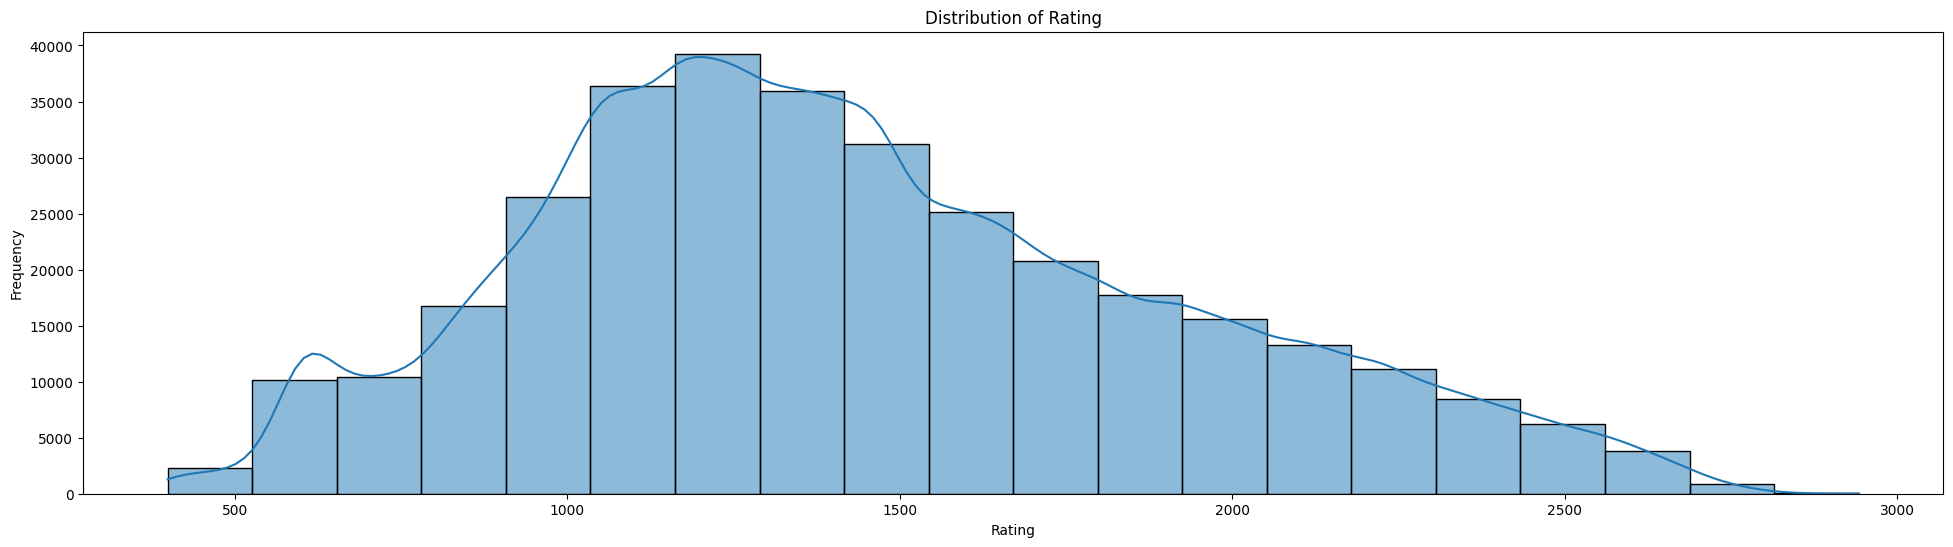

In [33]:
hist_plot(df[df["Popularity"] < 65.5], feature="Rating")

- RatingDevaiation > 107.5 data could be removed from dataset since the distribution is similar with original distribution.

### NbPlays

In [40]:
df[df["NbPlays"] > 5_000].shape

(340396, 10)

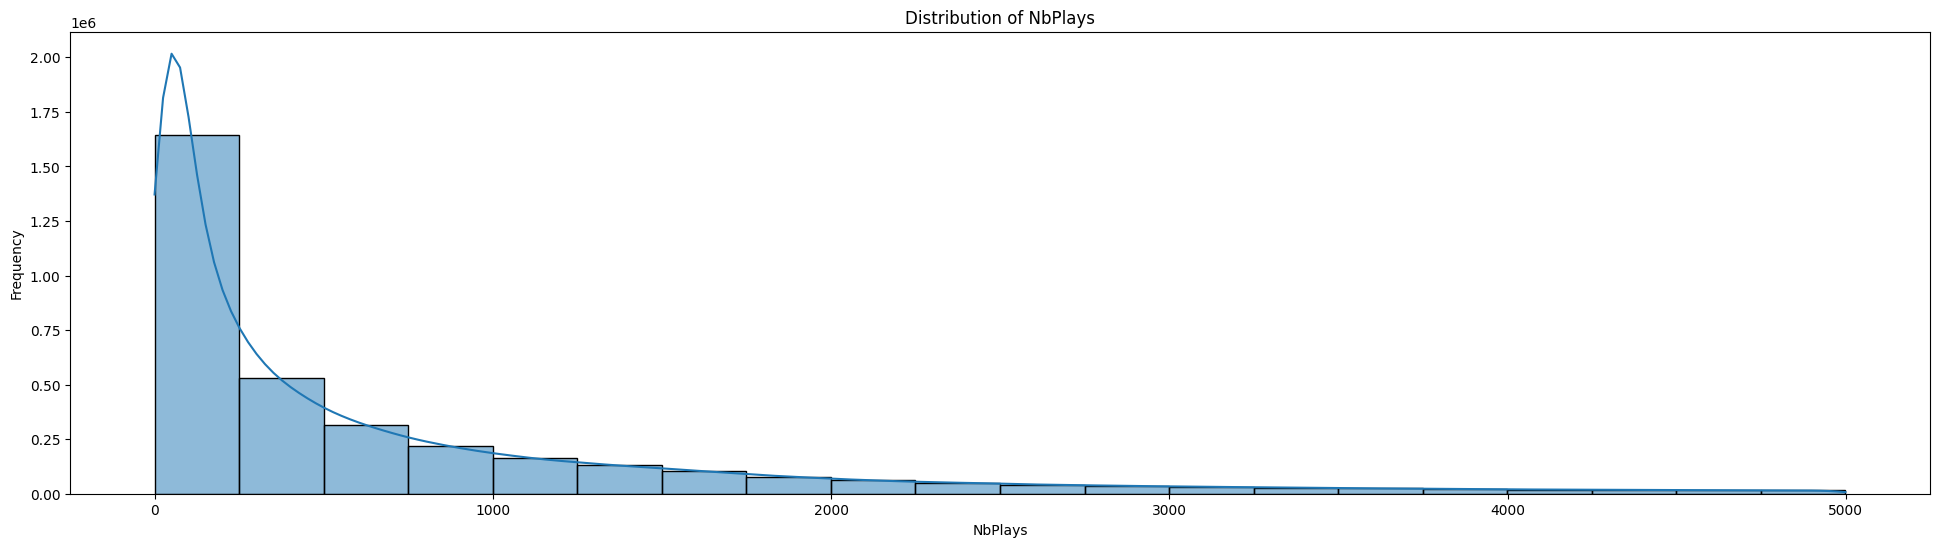

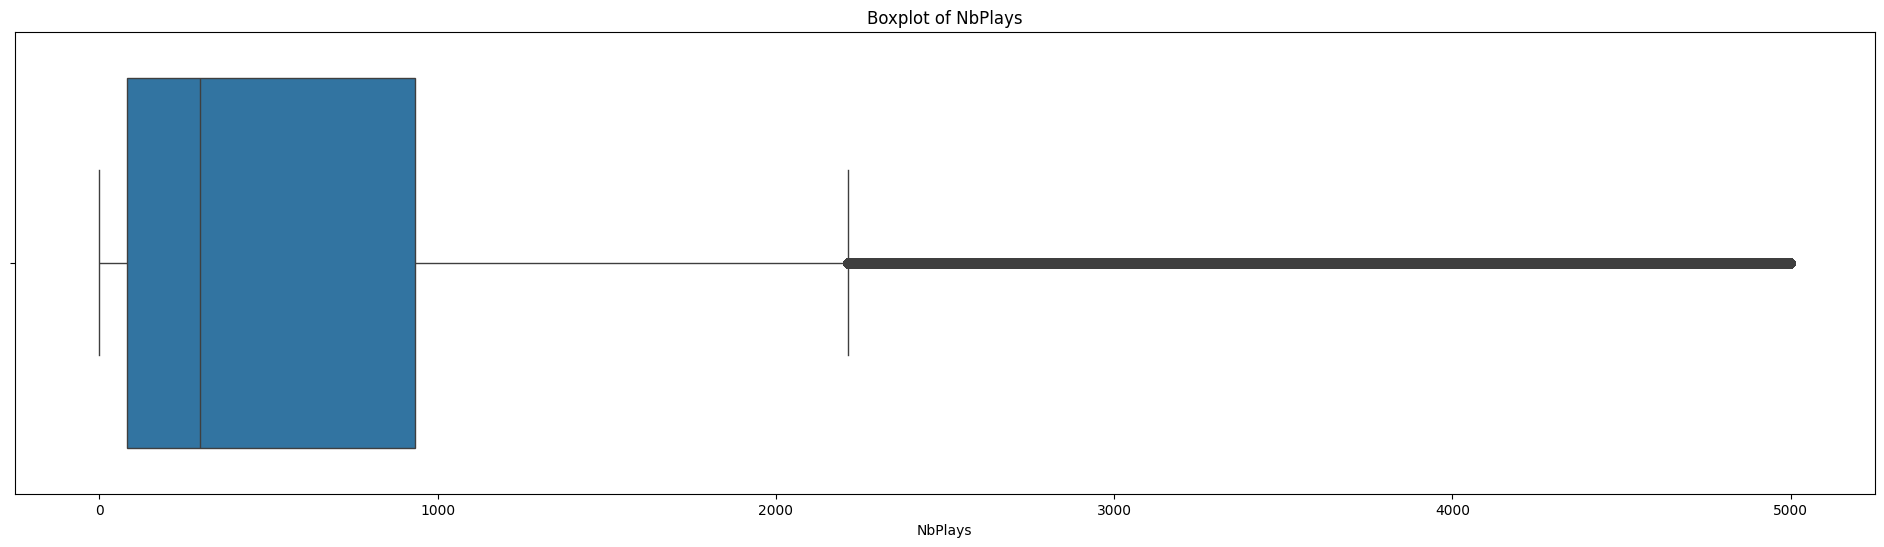

Lower Bound: -1198.5
Upper Bound: 2213.5
Number of Outliers: 309040


In [41]:
hist_plot(df[df["NbPlays"] < 5_000], feature=feature)
box_plot(df[df["NbPlays"] < 5_000], feature=feature)
IQR_outlier_analysis(df[df["NbPlays"] < 5_000], feature=feature)

In [47]:
df[df["NbPlays"] < 10].shape

(108736, 10)

- Puzzels that played less than 10 could be discarded from dataset 

### Themes

In [49]:
df["Themes"].isnull().sum()

1903

In [65]:
value_counts = df["Themes"].value_counts()
value_counts

Themes
advantage middlegame short                                                            177826
crushing middlegame short                                                             131791
endgame mate mateIn2 short                                                            121962
crushing endgame short                                                                103083
mate mateIn1 middlegame oneMove                                                       100196
                                                                                       ...  
crushing endgame fork hangingPiece master masterVsMaster veryLong                          1
advancedPawn crushing defensiveMove endgame exposedKing long queenEndgame                  1
crushing deflection discoveredAttack fork master middlegame pin short                      1
advancedPawn crushing defensiveMove deflection endgame master pawnEndgame veryLong         1
advantage attraction clearance kingsideAttack long middlegame t

In [69]:
value_counts[value_counts > 10_000].shape

(56,)

In [71]:
filtered_themes = value_counts[value_counts > 10_000].index
df_tmp = df[df['Themes'].isin(filtered_themes)]

mean_rating_per_theme = df_tmp.groupby('Themes')['Rating'].mean()
mean_rating_per_theme_sorted = mean_rating_per_theme.sort_values(ascending=False)
mean_rating_per_theme_sorted


Themes
advantage middlegame veryLong                     2164.571115
crushing endgame veryLong                         2121.898169
advantage defensiveMove middlegame short          1902.256844
crushing long middlegame                          1894.030411
advantage long middlegame                         1890.426547
crushing endgame long                             1830.331545
advantage endgame long                            1828.746575
crushing defensiveMove endgame short              1828.078740
advantage master middlegame short                 1794.285107
crushing master middlegame short                  1746.042288
crushing endgame long pawnEndgame                 1738.132155
crushing endgame long rookEndgame                 1701.718252
advantage fork long middlegame                    1699.296736
crushing fork long middlegame                     1687.594882
advantage middlegame short                        1649.382514
crushing middlegame short                         1642.943130
a

### OpeningTags

In [77]:
df["OpeningTags"].isna().sum()

3029847

### GameUrl - PuzzleId

In [78]:
df["GameUrl"].nunique()

3888765

In [79]:
df["PuzzleId"].nunique()


3888765

### FEN

In [83]:
df['FEN'].apply(is_valid_fen).value_counts().get(False, 0)

0

### Moves

In [ ]:
sum(not is_valid_move(row['FEN'], row['Moves']) for _, row in df.iterrows())

## Multivariate Analysis

In [9]:
from src.lib.eda_helpers import hexbin_plot, scatter_plot, violin_plot, pair_plot

### Pair Plot

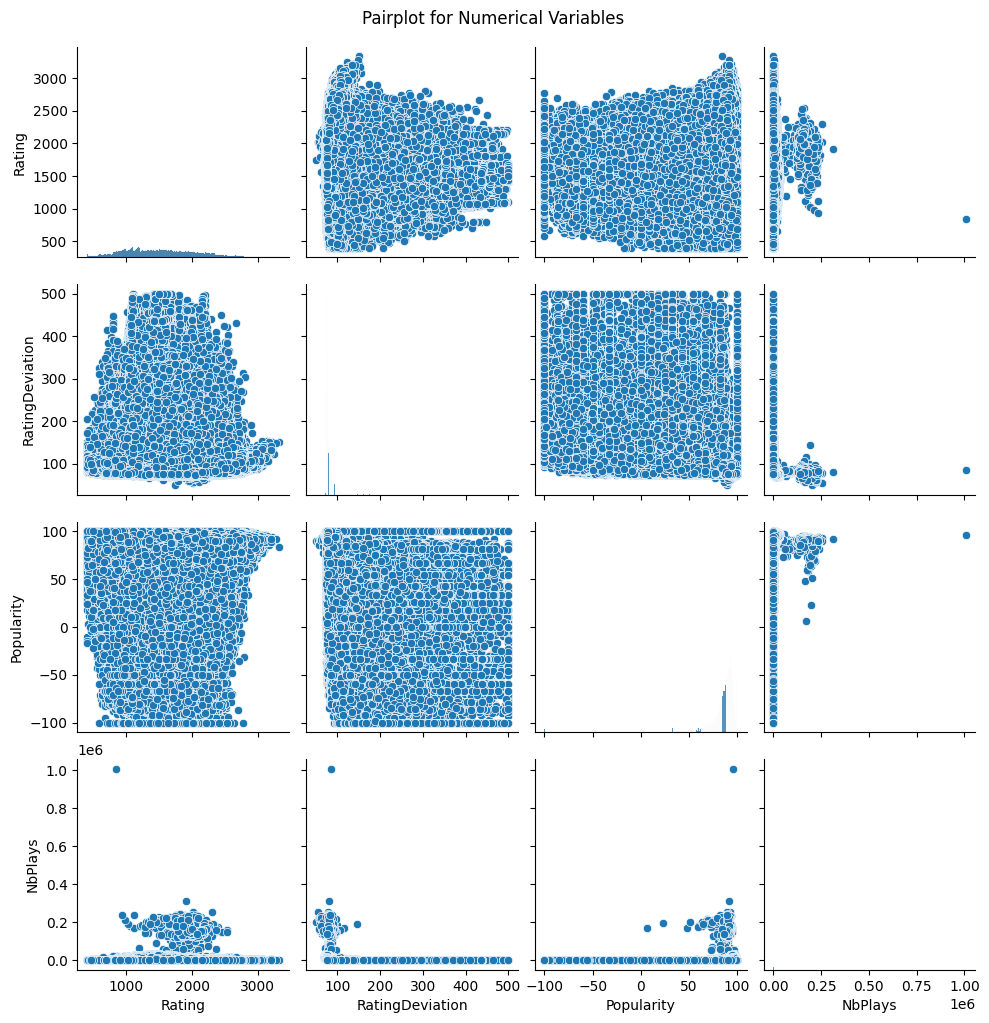

In [10]:
pair_plot(df, ['Rating', 'RatingDeviation', 'Popularity', 'NbPlays'])

### Rating vs Popularity

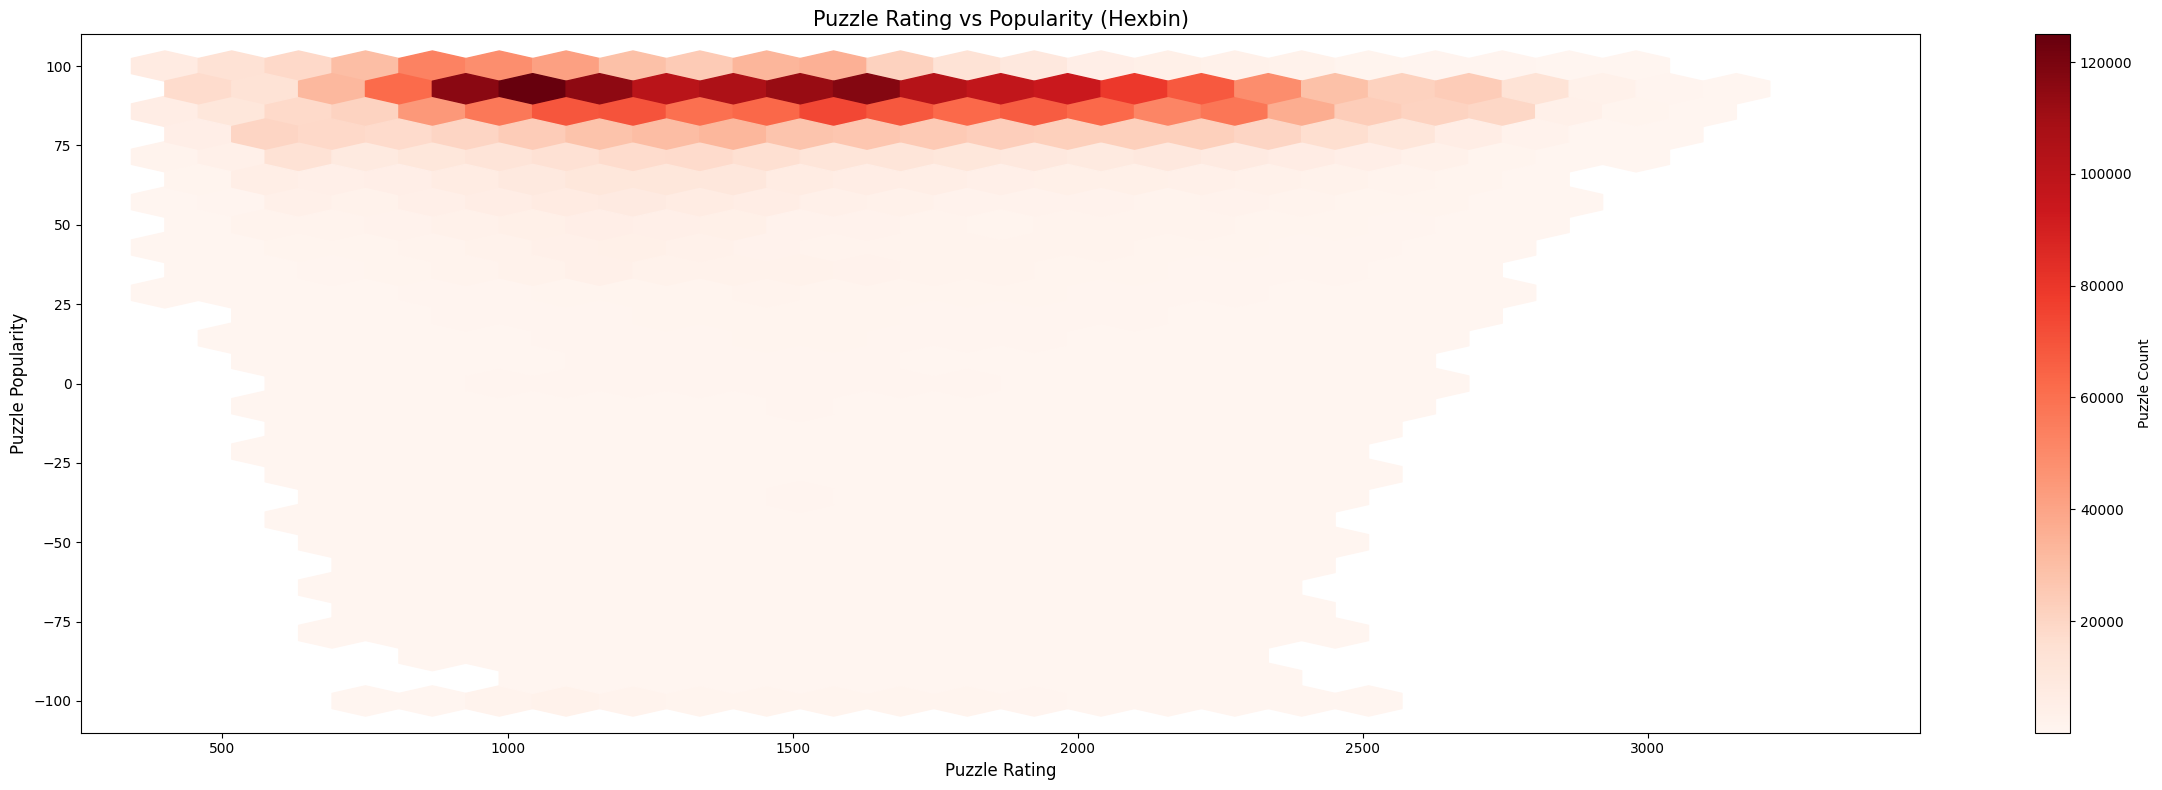

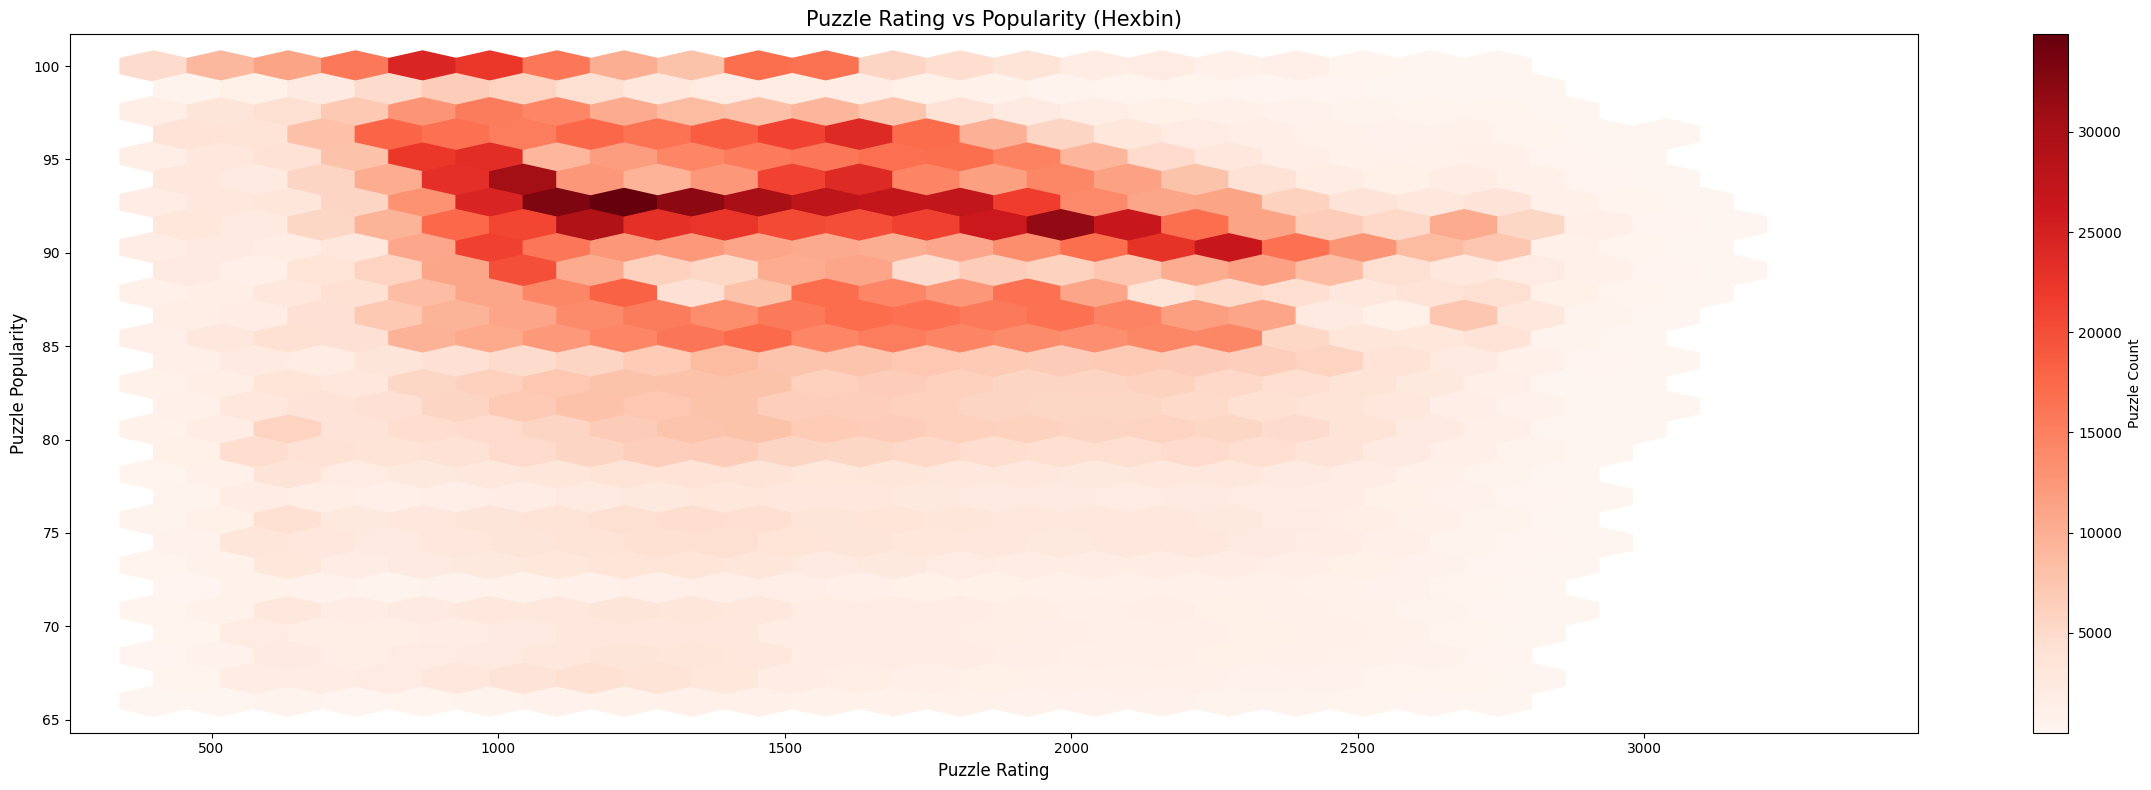

In [15]:
hexbin_plot(df, "Rating", "Popularity")
hexbin_plot(df[df["Popularity"] > 65.5], "Rating", "Popularity")

### NbPlays vs Popularity


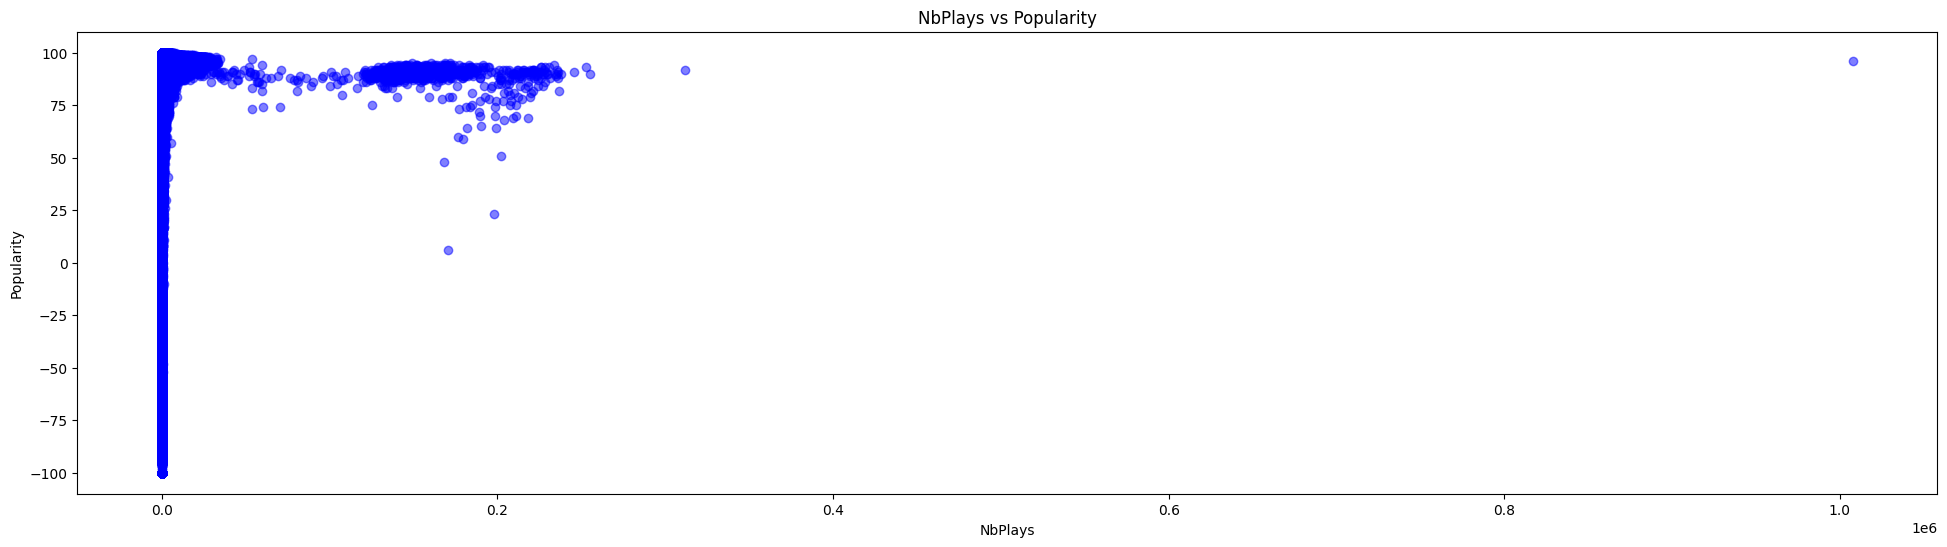

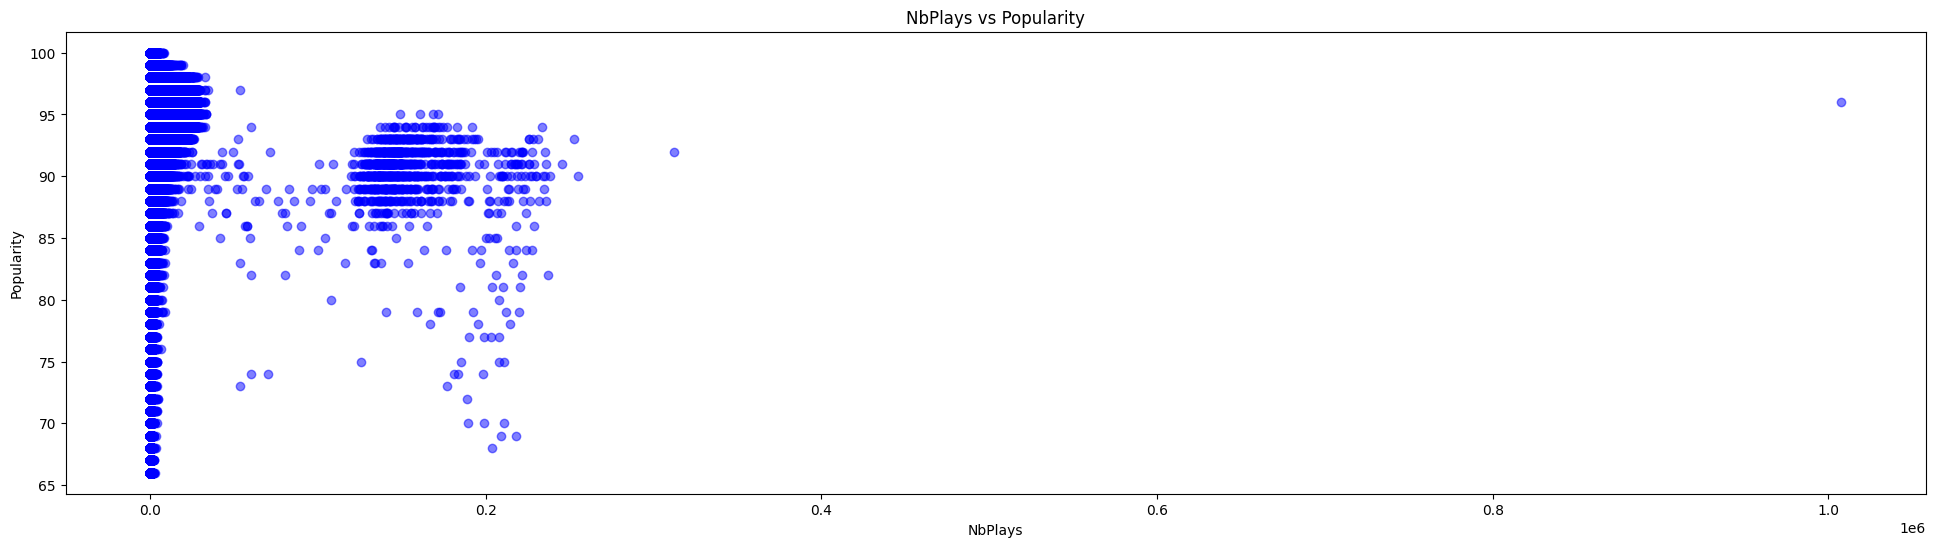

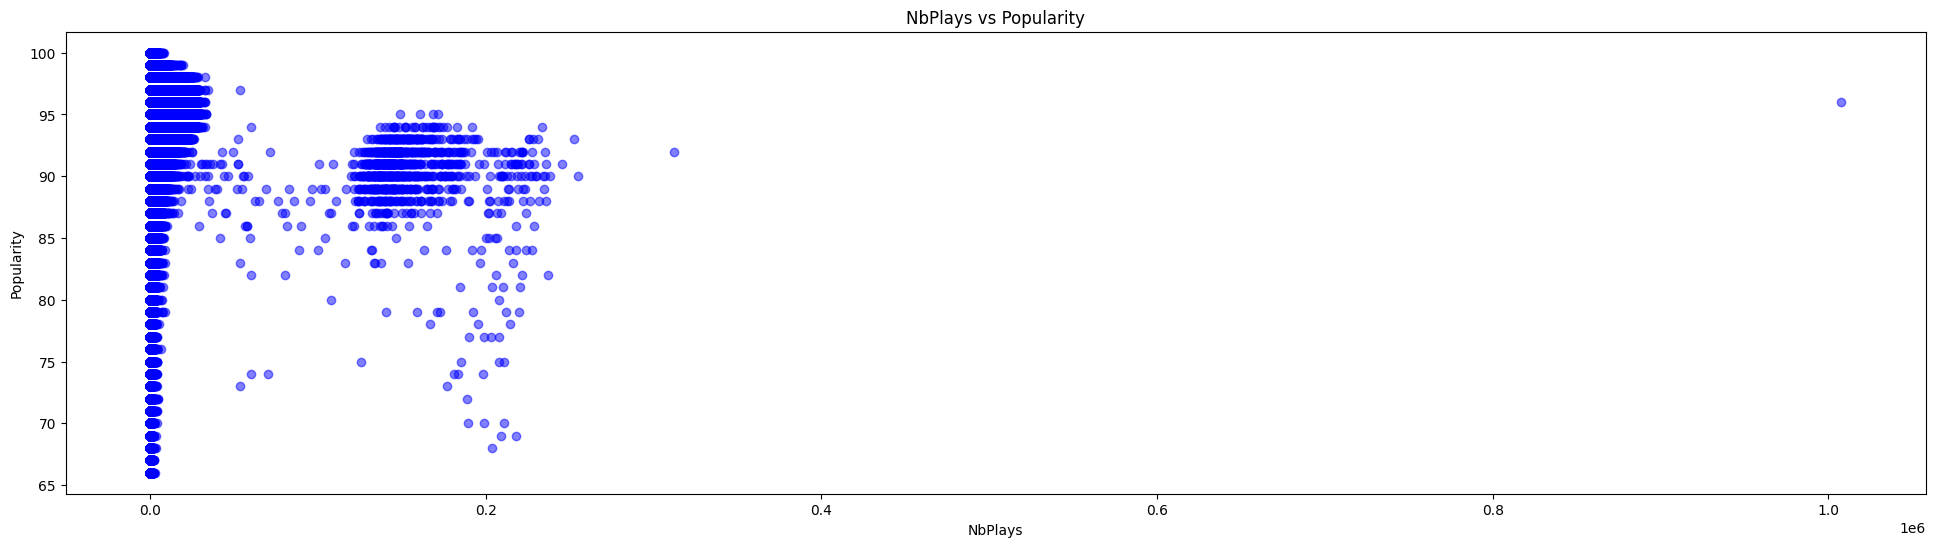

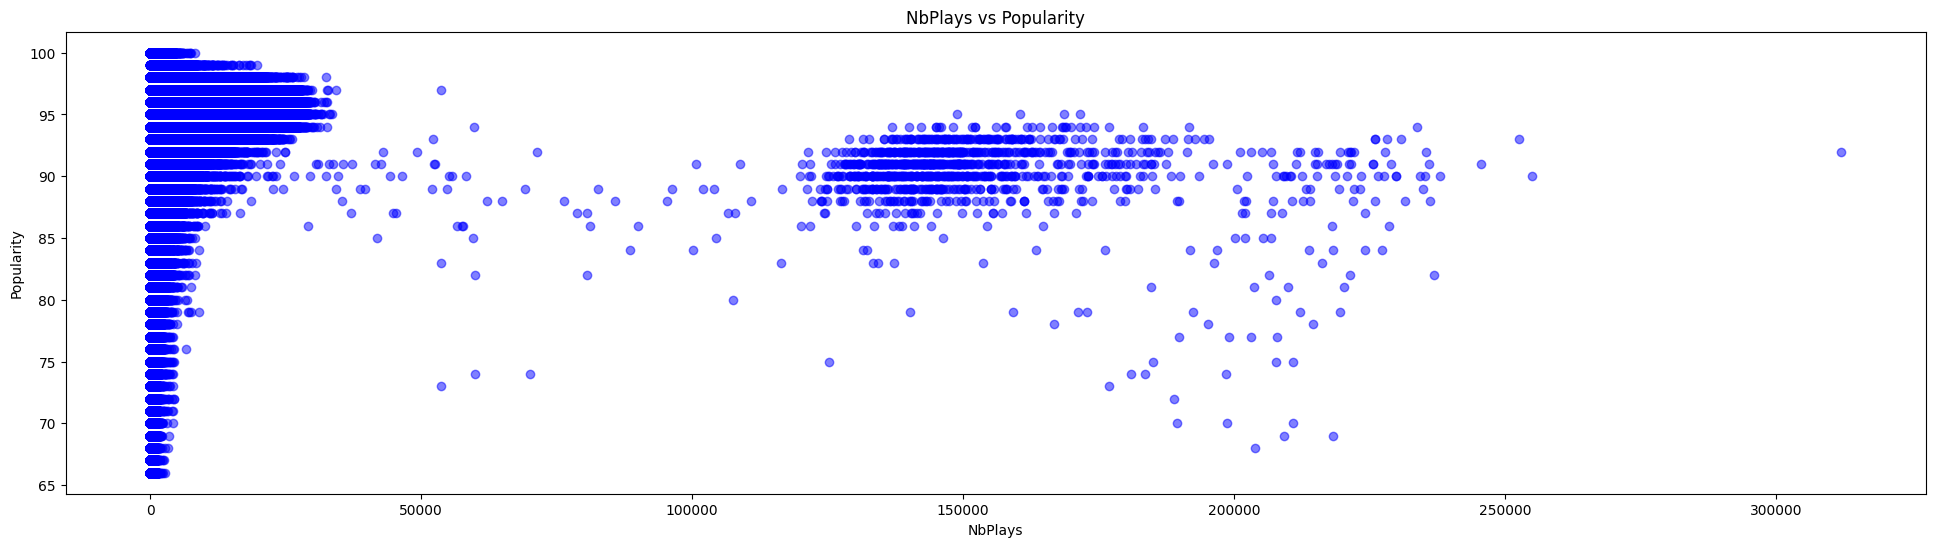

In [20]:
scatter_plot(df, "NbPlays", "Popularity")
scatter_plot(df[df["Popularity"] > 65.5], "NbPlays", "Popularity")
scatter_plot(df[(df["Popularity"] > 65.5) & (df["NbPlays"] > 10)], "NbPlays", "Popularity")
scatter_plot(df[(df["Popularity"] > 65.5) & (df["NbPlays"] > 10) & (df["NbPlays"] < 400_000)], "NbPlays", "Popularity")


### NbPlays vs Rating

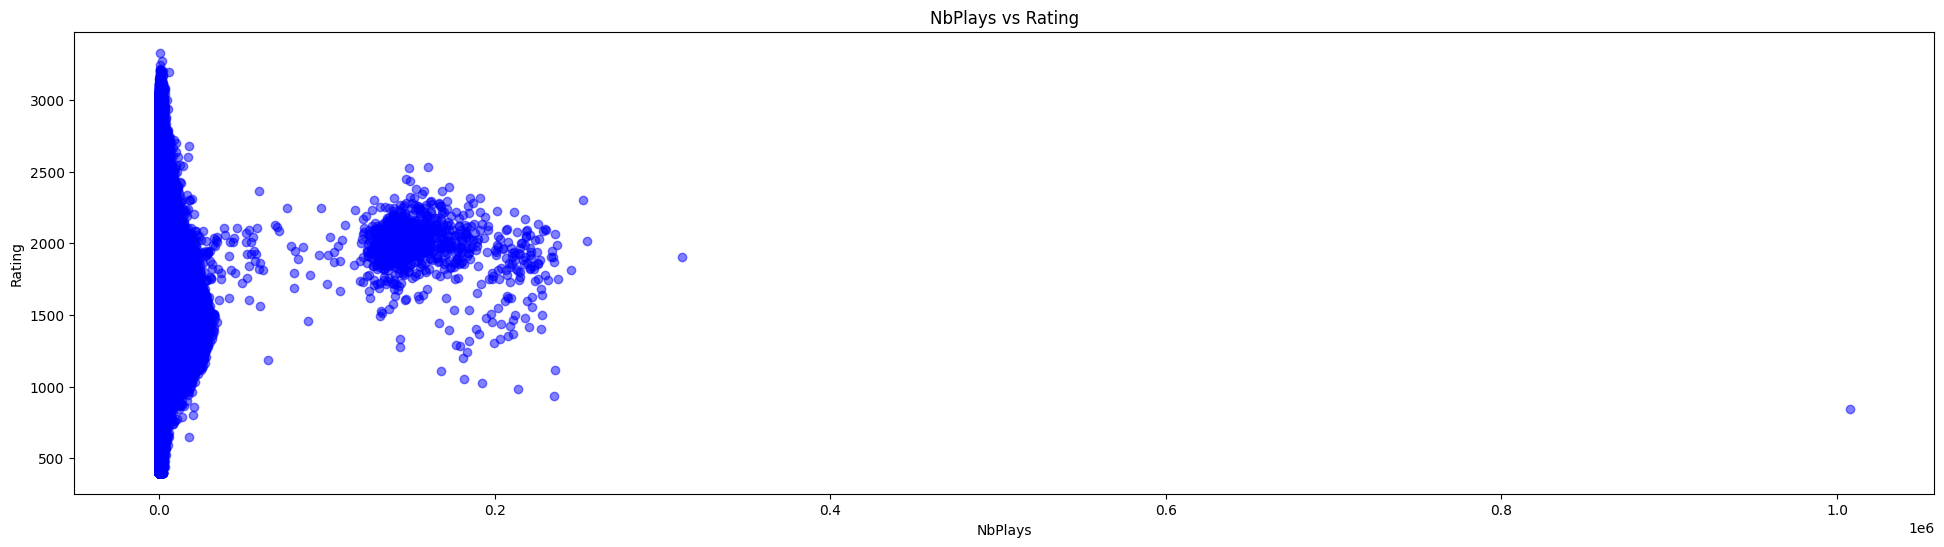

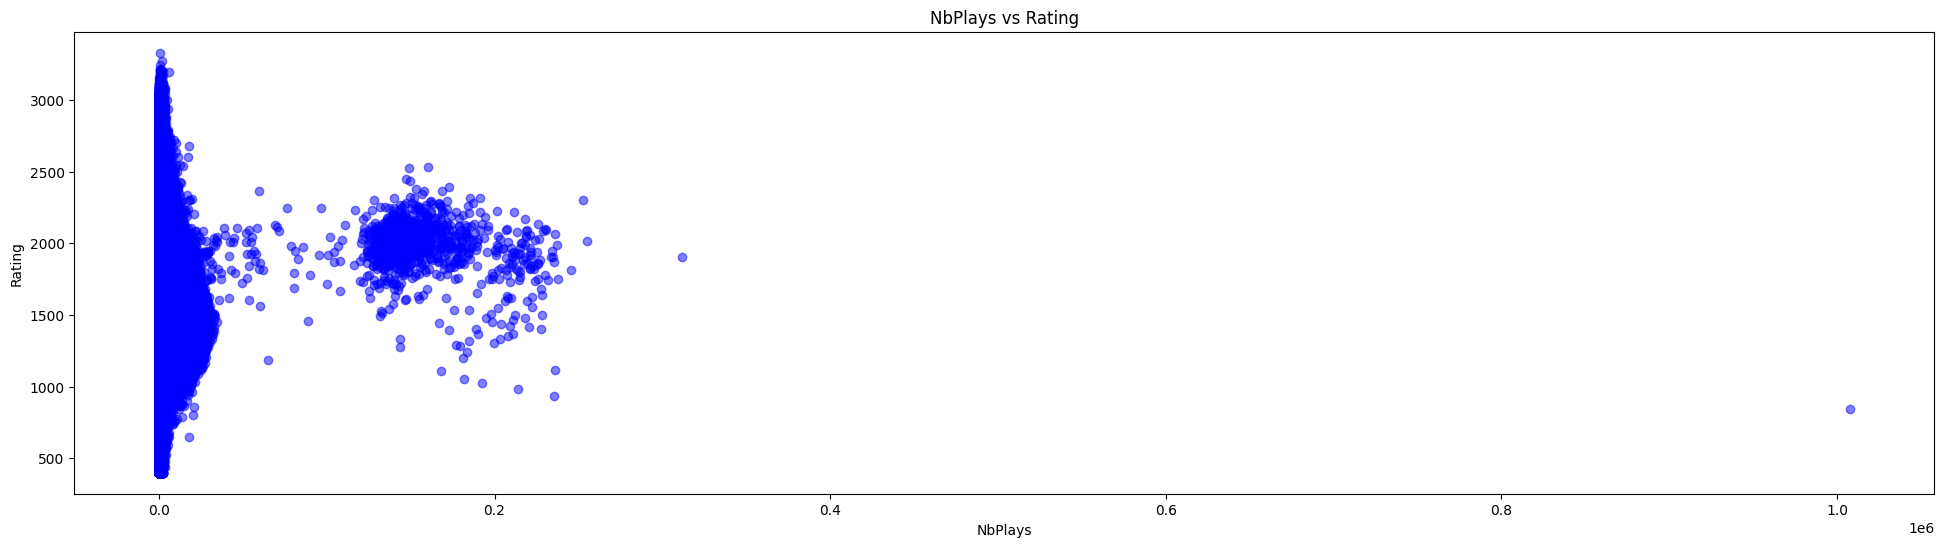

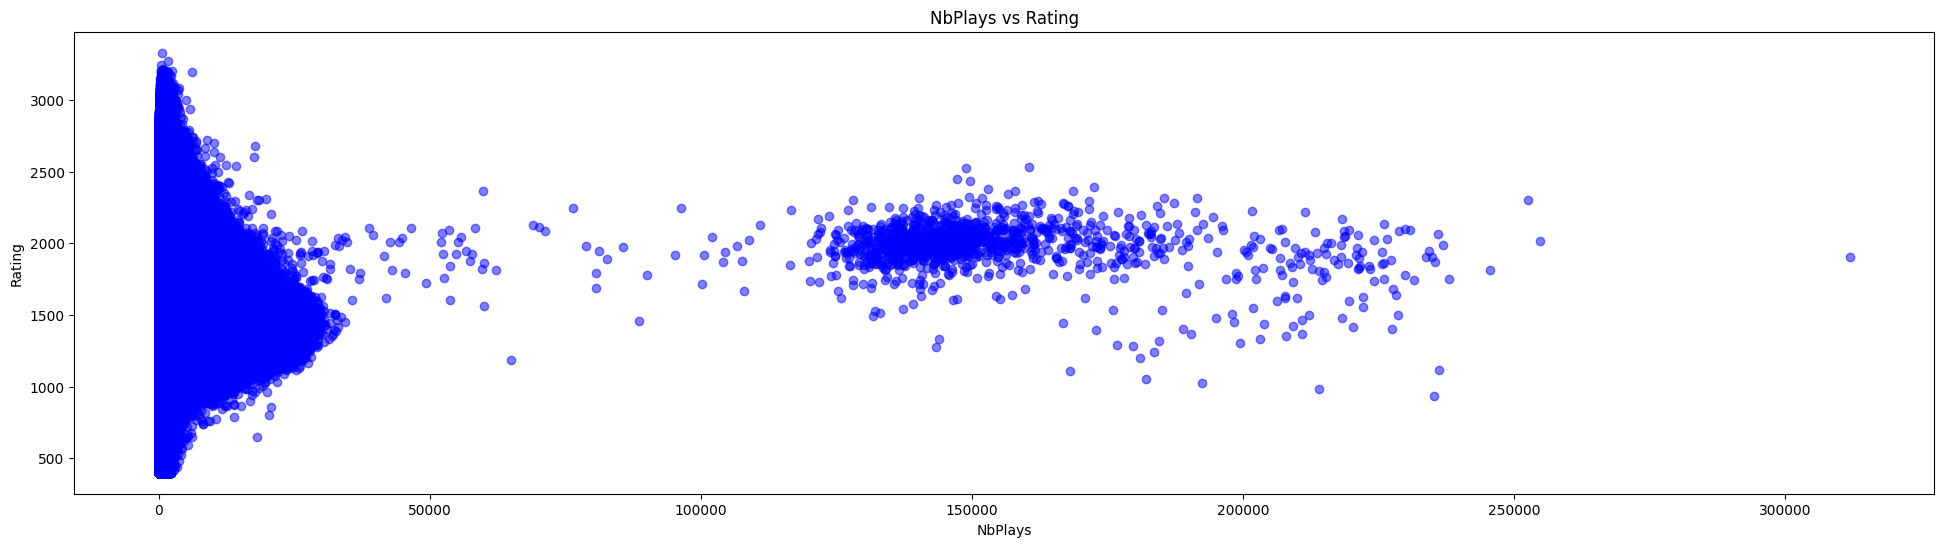

In [23]:
scatter_plot(df, "NbPlays", "Rating")
scatter_plot(df[df["NbPlays"] > 10], "NbPlays", "Rating")
scatter_plot(df[(df["NbPlays"] > 10) & (df["NbPlays"] < 400_000)], "NbPlays", "Rating")

### MoveLength vs Rating

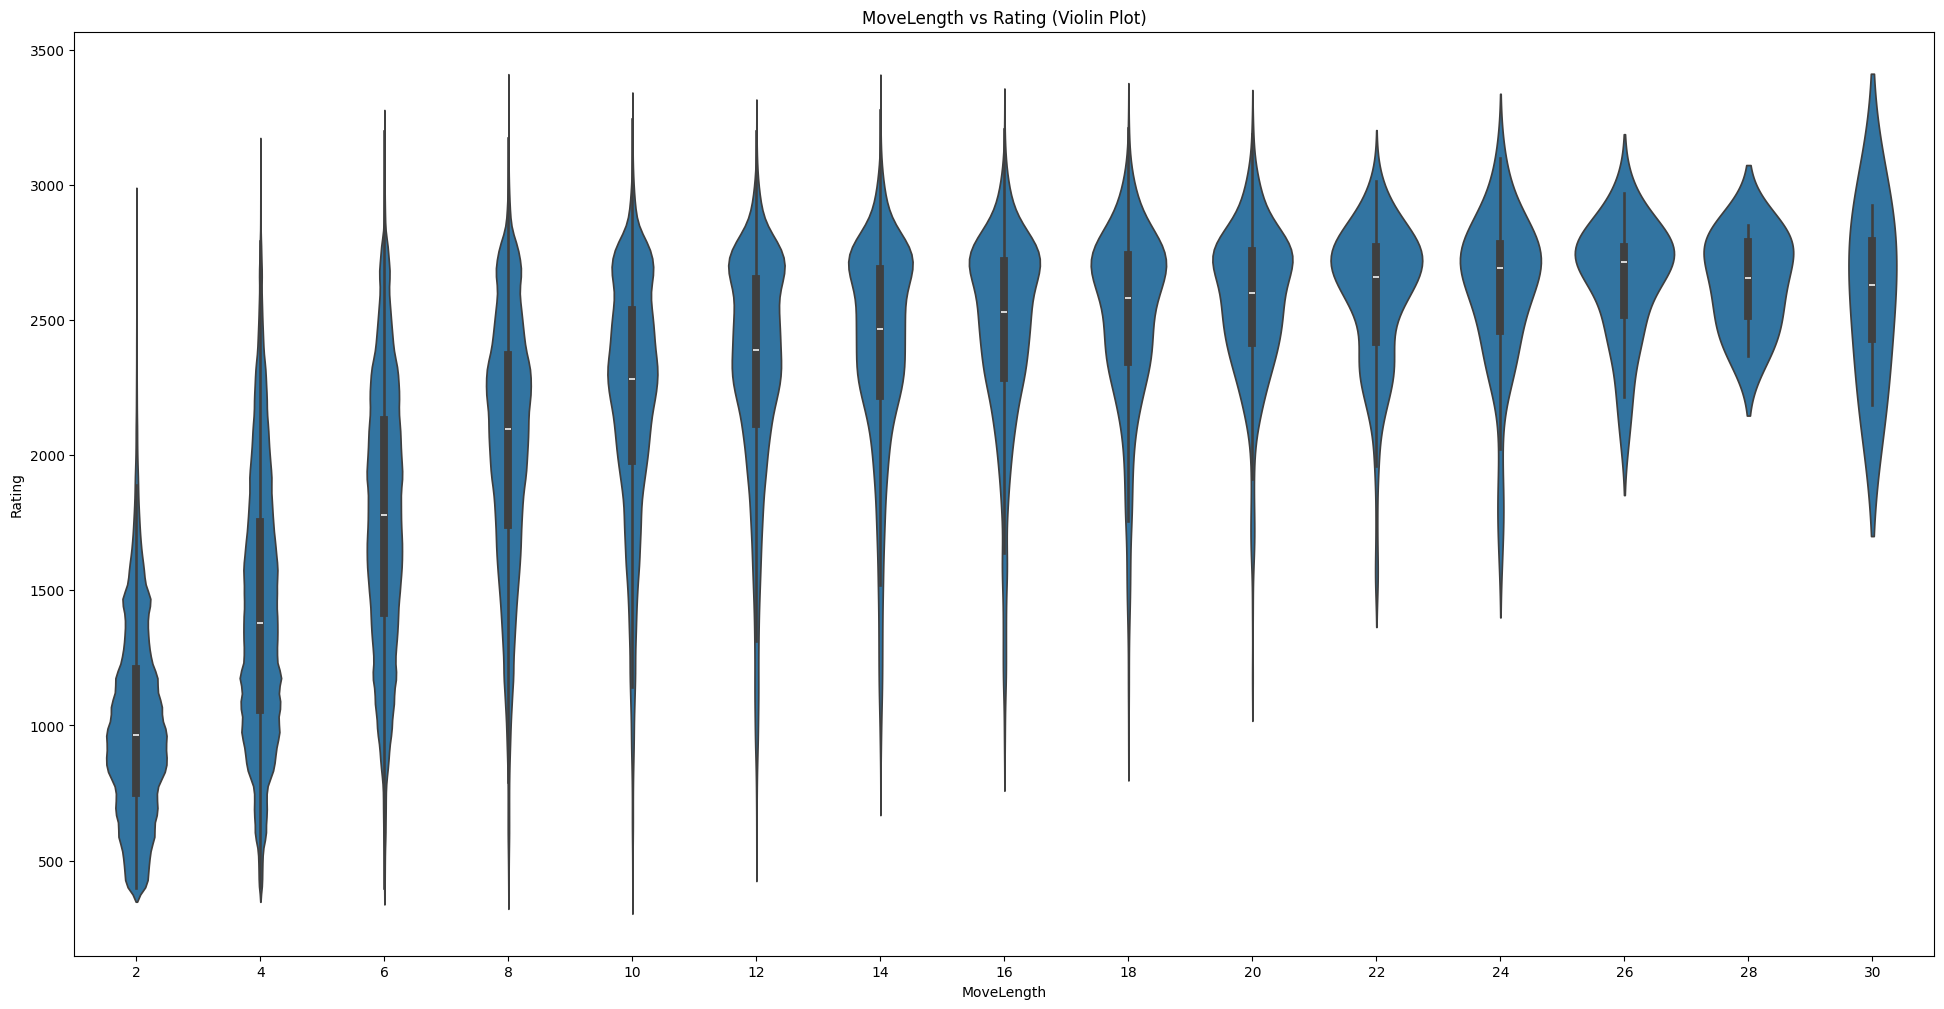

In [25]:
df_tmp = df.copy()
df_tmp['MoveLength'] = df_tmp['Moves'].apply(lambda x: len(x.split()))
violin_plot(df_tmp, "MoveLength", "Rating")
del df_tmp

### Rating vs RatingDeviation

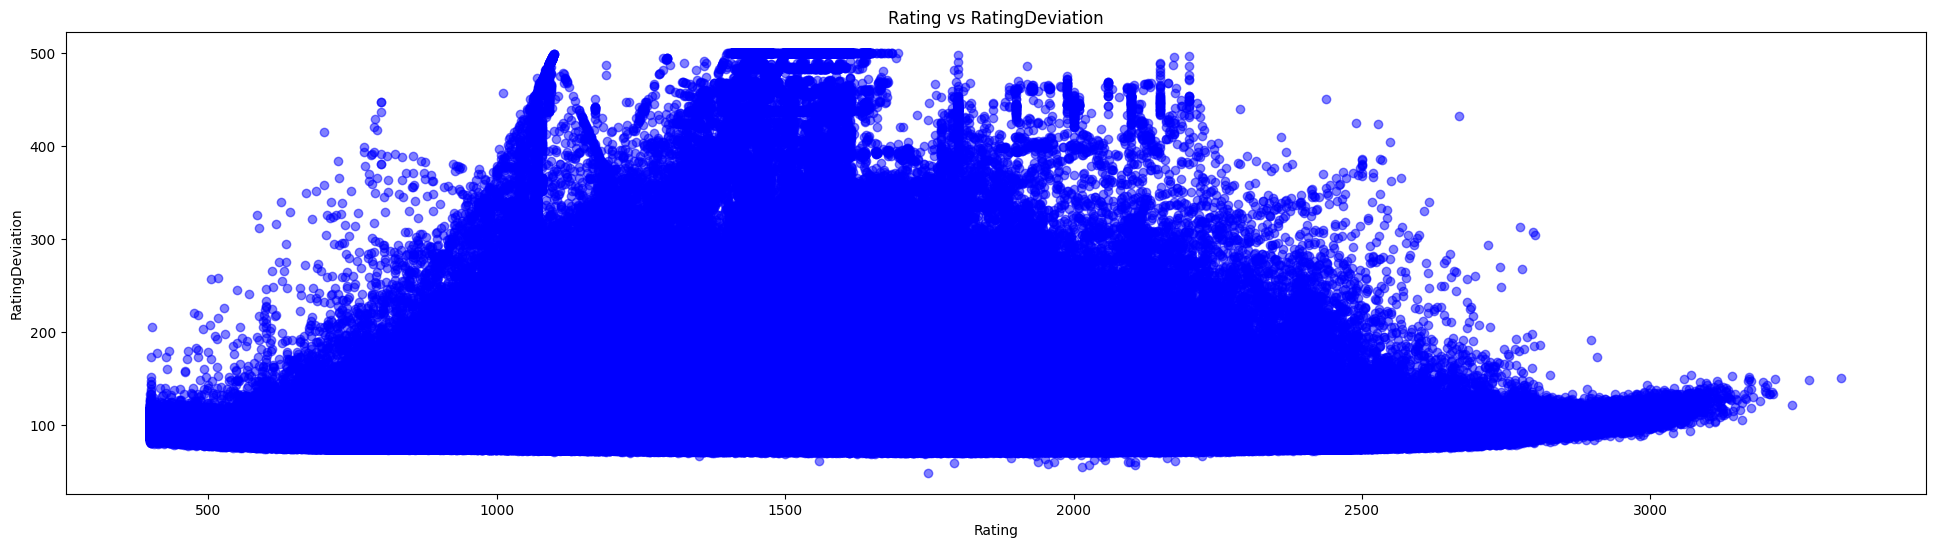

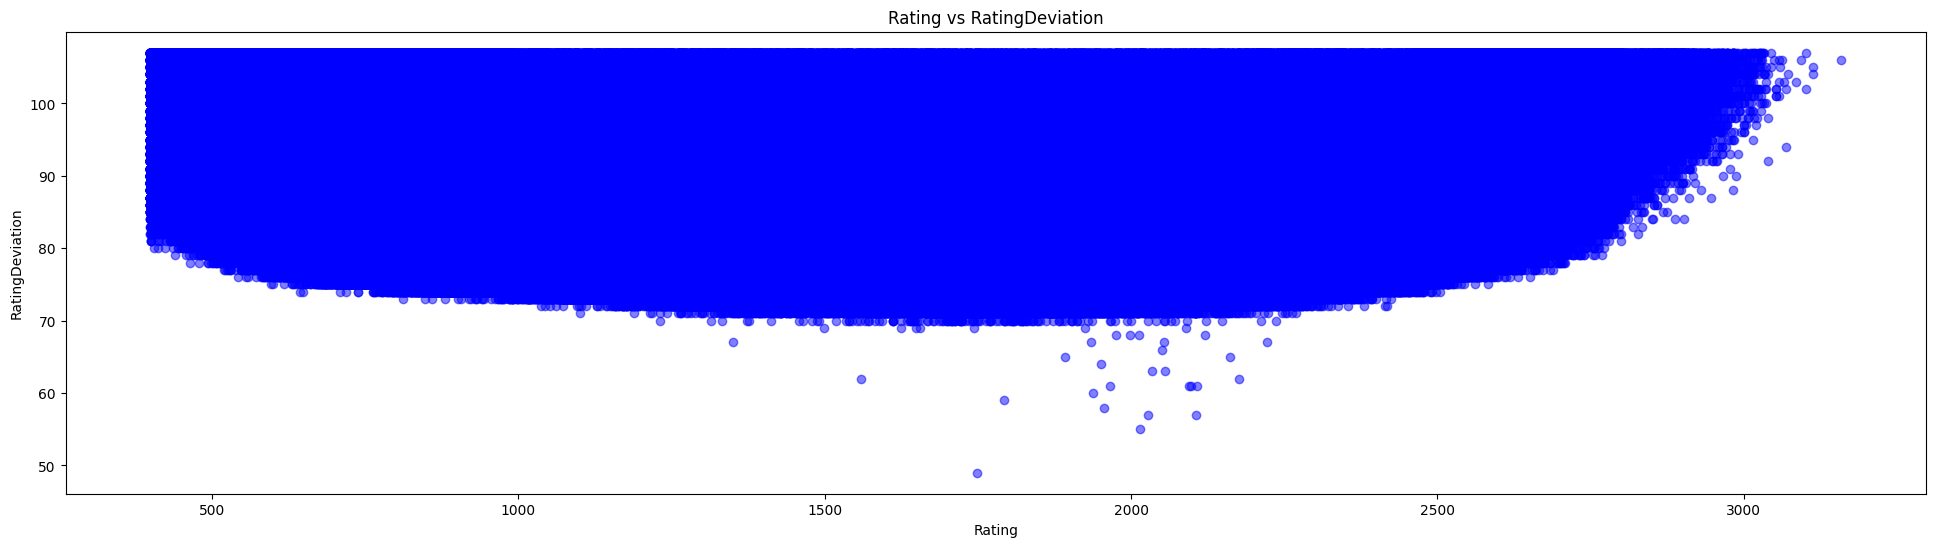

In [27]:
scatter_plot(df, "Rating", "RatingDeviation")
scatter_plot(df[df["RatingDeviation"] < 107.5], "Rating", "RatingDeviation")


### NbPlays vs RatingDeviation

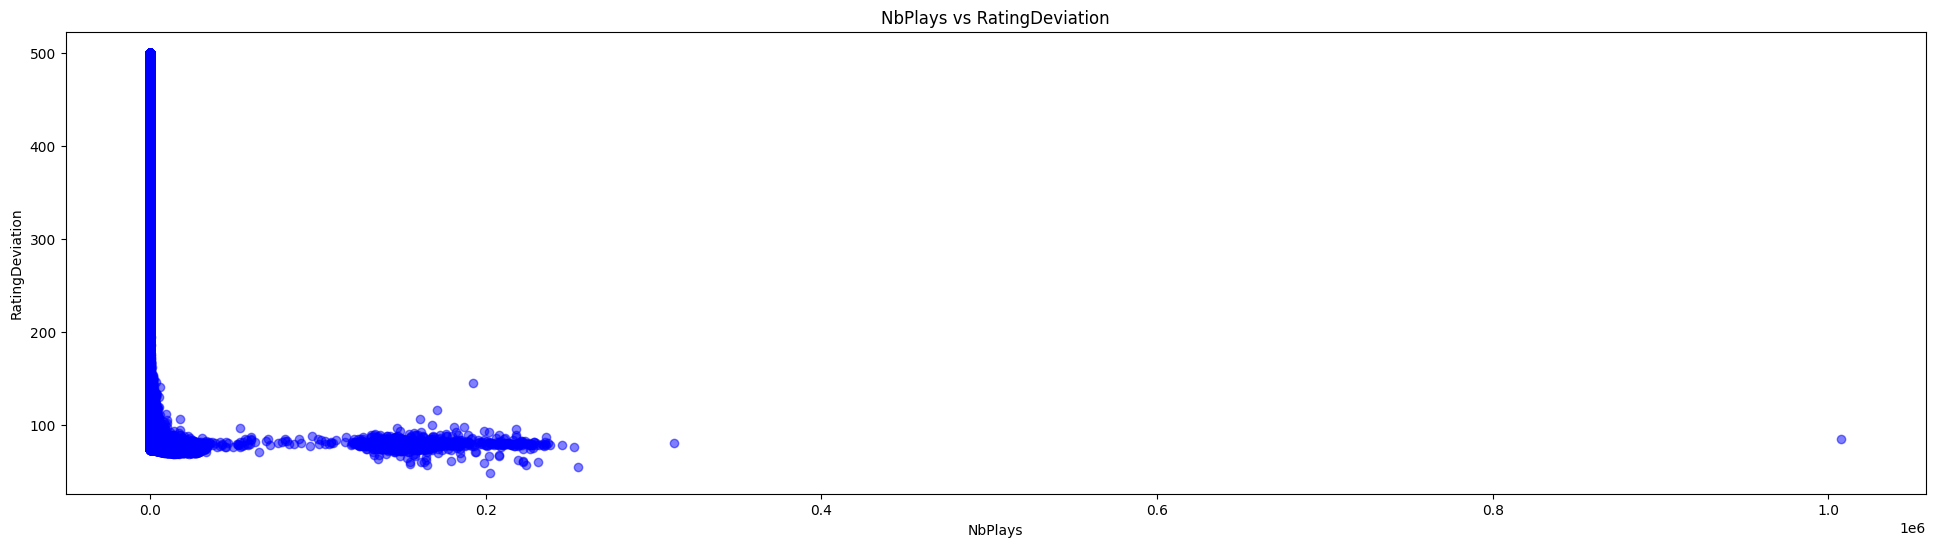

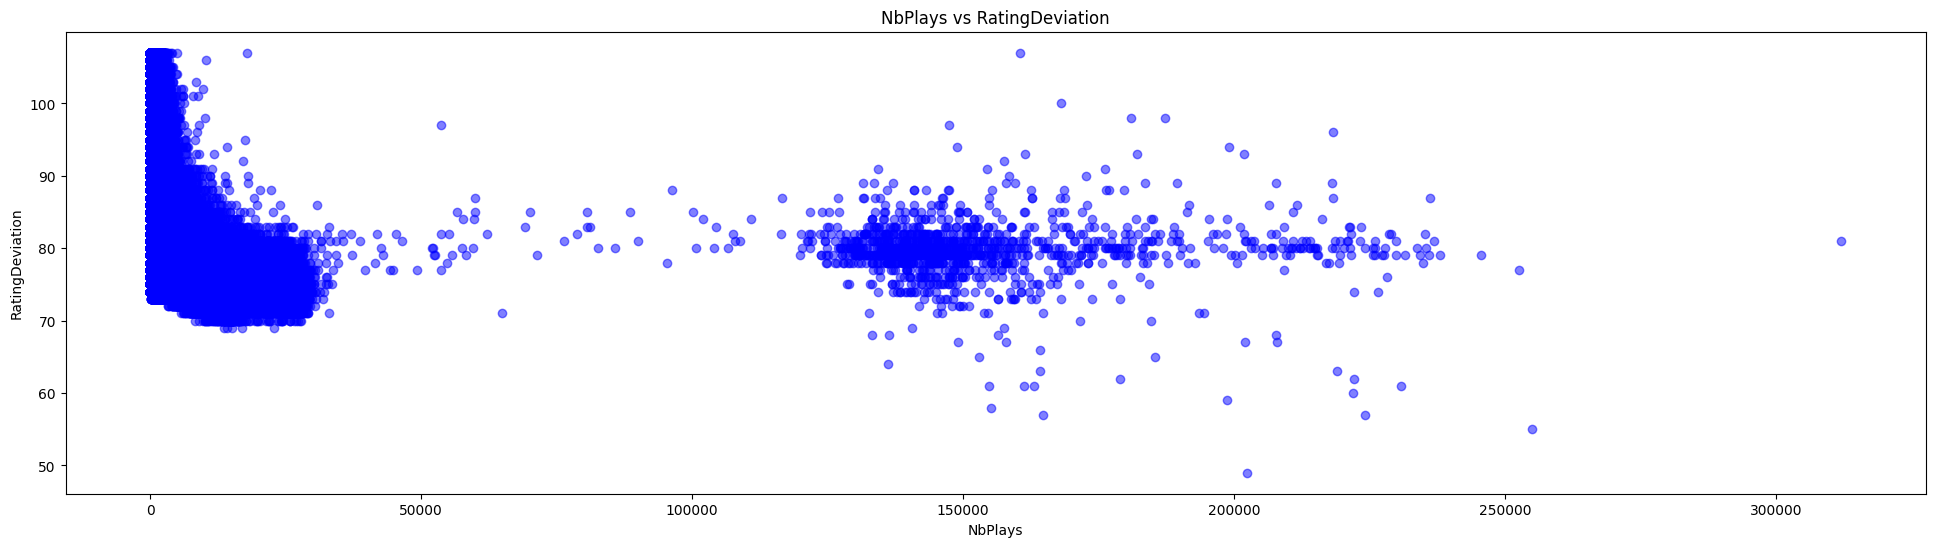

In [28]:
scatter_plot(df, "NbPlays", "RatingDeviation")
scatter_plot(df[(df["NbPlays"] > 10) & (df["NbPlays"] < 400_000) & (df["RatingDeviation"] < 107.5)], "NbPlays", "RatingDeviation")

## Dataset Extraction

In [7]:
from src.lib.fen_parser import update_dataframe_with_new_fen


In [8]:
df = update_dataframe_with_new_fen(df)


In [ ]:
df_final = df.copy()

# Filter NbPlays
df_final = df_final[df_final["NbPlays"] > 10]

# Filter RatingDeviation
df_final = df_final[df_final["RatingDeviation"] < 107.5]

# Filter Popularity
df_final = df_final[df_final["Popularity"] > 65.5]


df_final = df_final.reset_index()

In [18]:
df_final.to_csv("../data/filtered/filtered_df.csv", index=False)